In [1]:
import os
import sys

# Allow imports from src/
sys.path.append(os.path.abspath(".."))

from src.download_daicwoz import extract_daicwoz_transcripts, download_phq_file
from src.context_chunker import  match_phq_transcripts, generate_dataset, build_text_representations, save_text_representations

In [2]:
# Define data directory (relative to project root)
ZIP_DIR = "../data/raw/zips"
TRANSCRIPT_DIR = "../data/raw/transcripts"
PHQ_FILE_PATH = "../data/raw/phq/phq_scores.csv"
PROCESSED_DATA_DIR = "../data/processed/"

# Ensure directory exists
os.makedirs(ZIP_DIR, exist_ok=True)
os.makedirs(TRANSCRIPT_DIR, exist_ok=True)
os.makedirs(os.path.dirname(PHQ_FILE_PATH), exist_ok=True)
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)

print(f"Download directory: {os.path.abspath(ZIP_DIR)}")
print(f"Transcript directory: {os.path.abspath(TRANSCRIPT_DIR)}")
print(f"PHQ file directory: {os.path.abspath(os.path.dirname(PHQ_FILE_PATH))}")
print(f"Processed data directory: {os.path.abspath(PROCESSED_DATA_DIR)}")


Download directory: /Users/sun/Desktop/OMSCS/2025_Fall/Deep Learning/Projects/DeepPHQ/data/raw/zips
Transcript directory: /Users/sun/Desktop/OMSCS/2025_Fall/Deep Learning/Projects/DeepPHQ/data/raw/transcripts
PHQ file directory: /Users/sun/Desktop/OMSCS/2025_Fall/Deep Learning/Projects/DeepPHQ/data/raw/phq
Processed data directory: /Users/sun/Desktop/OMSCS/2025_Fall/Deep Learning/Projects/DeepPHQ/data/processed


In [3]:
extract_daicwoz_transcripts(
    zip_dir=ZIP_DIR,
    out_dir=TRANSCRIPT_DIR,
    start_id=300,
    end_id=492,
    remove_zip=True
)

Found 80 zip files and 55 transcripts.

Transcript already exists for 300, skipping.
Extracting from existing ZIP for 301...
Failed to extract 301_P.zip: File is not a zip file
Transcript already exists for 302, skipping.
Transcript already exists for 303, skipping.
Transcript already exists for 304, skipping.
Transcript already exists for 305, skipping.
Transcript already exists for 306, skipping.
Transcript already exists for 307, skipping.
Transcript already exists for 308, skipping.
Transcript already exists for 309, skipping.
Transcript already exists for 310, skipping.
Transcript already exists for 311, skipping.
Transcript already exists for 312, skipping.
Transcript already exists for 313, skipping.
Transcript already exists for 314, skipping.
Transcript already exists for 315, skipping.
Transcript already exists for 316, skipping.
Transcript already exists for 317, skipping.
Transcript already exists for 318, skipping.
Transcript already exists for 319, skipping.
Transcript al

422_P.zip: 100%|██████████| 653M/653M [01:18<00:00, 8.27MB/s]  


Downloaded: 422_P.zip
Extracted: 422_TRANSCRIPT.csv
Transcript already exists for 423, skipping.
Extracting from existing ZIP for 424...
Failed to extract 424_P.zip: File is not a zip file
Extracting from existing ZIP for 425...
Failed to extract 425_P.zip: File is not a zip file
Extracting from existing ZIP for 426...
Failed to extract 426_P.zip: File is not a zip file
Extracting from existing ZIP for 427...
Failed to extract 427_P.zip: File is not a zip file
Extracting from existing ZIP for 428...
Failed to extract 428_P.zip: File is not a zip file
Extracting from existing ZIP for 429...
Failed to extract 429_P.zip: File is not a zip file
Extracting from existing ZIP for 430...
Failed to extract 430_P.zip: File is not a zip file
Extracting from existing ZIP for 431...
Failed to extract 431_P.zip: File is not a zip file
Extracting from existing ZIP for 432...
Failed to extract 432_P.zip: File is not a zip file
Extracting from existing ZIP for 433...
Failed to extract 433_P.zip: File i

439_P.zip: 100%|██████████| 655M/655M [17:47<00:00, 613kB/s]    


Downloaded: 439_P.zip
Extracted: 439_TRANSCRIPT.csv


440_P.zip: 100%|██████████| 724M/724M [01:53<00:00, 6.37MB/s]  


Downloaded: 440_P.zip
Extracted: 440_TRANSCRIPT.csv


441_P.zip: 100%|██████████| 477M/477M [01:02<00:00, 7.67MB/s]   


Downloaded: 441_P.zip
Extracted: 441_TRANSCRIPT.csv


442_P.zip: 100%|██████████| 497M/497M [01:56<00:00, 4.27MB/s]  


Downloaded: 442_P.zip
Extracted: 442_TRANSCRIPT.csv


443_P.zip: 100%|██████████| 361M/361M [01:38<00:00, 3.68MB/s]   


Downloaded: 443_P.zip
Extracted: 443_TRANSCRIPT.csv


444_P.zip: 100%|██████████| 682M/682M [01:53<00:00, 6.03MB/s]   


Downloaded: 444_P.zip
Extracted: 444_TRANSCRIPT.csv


445_P.zip: 100%|██████████| 362M/362M [01:18<00:00, 4.63MB/s]   


Downloaded: 445_P.zip
Extracted: 445_TRANSCRIPT.csv


446_P.zip: 100%|██████████| 519M/519M [02:07<00:00, 4.06MB/s]   


Downloaded: 446_P.zip
Extracted: 446_TRANSCRIPT.csv


447_P.zip: 100%|██████████| 425M/425M [01:52<00:00, 3.79MB/s]   


Downloaded: 447_P.zip
Extracted: 447_TRANSCRIPT.csv


448_P.zip: 100%|██████████| 648M/648M [03:06<00:00, 3.48MB/s]   


Downloaded: 448_P.zip
Extracted: 448_TRANSCRIPT.csv


449_P.zip: 100%|██████████| 537M/537M [01:37<00:00, 5.50MB/s]  


Downloaded: 449_P.zip
Extracted: 449_TRANSCRIPT.csv


450_P.zip: 100%|██████████| 661M/661M [02:17<00:00, 4.82MB/s]   


Downloaded: 450_P.zip
Extracted: 450_TRANSCRIPT.csv


451_P.zip: 100%|██████████| 614M/614M [01:37<00:00, 6.32MB/s]  


Downloaded: 451_P.zip
Extracted: 451_TRANSCRIPT.csv


452_P.zip: 100%|██████████| 459M/459M [01:49<00:00, 4.18MB/s]   


Downloaded: 452_P.zip
Extracted: 452_TRANSCRIPT.csv


453_P.zip: 100%|██████████| 524M/524M [01:31<00:00, 5.75MB/s]  


Downloaded: 453_P.zip
Extracted: 453_TRANSCRIPT.csv


454_P.zip: 100%|██████████| 416M/416M [01:57<00:00, 3.54MB/s]   


Downloaded: 454_P.zip
Extracted: 454_TRANSCRIPT.csv


455_P.zip: 100%|██████████| 381M/381M [01:30<00:00, 4.19MB/s]   


Downloaded: 455_P.zip
Extracted: 455_TRANSCRIPT.csv


456_P.zip: 100%|██████████| 442M/442M [01:52<00:00, 3.94MB/s]   


Downloaded: 456_P.zip
Extracted: 456_TRANSCRIPT.csv


457_P.zip: 100%|██████████| 497M/497M [01:48<00:00, 4.59MB/s]   


Downloaded: 457_P.zip
Extracted: 457_TRANSCRIPT.csv


458_P.zip: 100%|██████████| 501M/501M [01:32<00:00, 5.42MB/s]   


Downloaded: 458_P.zip
Extracted: 458_TRANSCRIPT.csv


459_P.zip: 100%|██████████| 506M/506M [01:25<00:00, 5.90MB/s]   


Downloaded: 459_P.zip
Extracted: 459_TRANSCRIPT.csv
File not found on server: 460_P.zip


461_P.zip: 100%|██████████| 515M/515M [01:47<00:00, 4.77MB/s]   


Downloaded: 461_P.zip
Extracted: 461_TRANSCRIPT.csv


462_P.zip: 100%|██████████| 466M/466M [02:41<00:00, 2.88MB/s] 


Downloaded: 462_P.zip
Extracted: 462_TRANSCRIPT.csv


463_P.zip: 100%|██████████| 436M/436M [01:53<00:00, 3.83MB/s]   


Downloaded: 463_P.zip
Extracted: 463_TRANSCRIPT.csv


464_P.zip: 100%|██████████| 509M/509M [01:30<00:00, 5.60MB/s] 


Downloaded: 464_P.zip
Extracted: 464_TRANSCRIPT.csv


465_P.zip: 100%|██████████| 608M/608M [01:55<00:00, 5.28MB/s]   


Downloaded: 465_P.zip
Extracted: 465_TRANSCRIPT.csv


466_P.zip: 100%|██████████| 764M/764M [02:30<00:00, 5.08MB/s]  


Downloaded: 466_P.zip
Extracted: 466_TRANSCRIPT.csv


467_P.zip: 100%|██████████| 457M/457M [01:33<00:00, 4.87MB/s]   


Downloaded: 467_P.zip
Extracted: 467_TRANSCRIPT.csv


468_P.zip: 100%|██████████| 495M/495M [01:49<00:00, 4.51MB/s] 


Downloaded: 468_P.zip
Extracted: 468_TRANSCRIPT.csv


469_P.zip: 100%|██████████| 563M/563M [03:10<00:00, 2.96MB/s]   


Downloaded: 469_P.zip
Extracted: 469_TRANSCRIPT.csv


470_P.zip: 100%|██████████| 479M/479M [01:45<00:00, 4.53MB/s] 


Downloaded: 470_P.zip
Extracted: 470_TRANSCRIPT.csv


471_P.zip: 100%|██████████| 531M/531M [01:26<00:00, 6.16MB/s]   


Downloaded: 471_P.zip
Extracted: 471_TRANSCRIPT.csv


472_P.zip: 100%|██████████| 470M/470M [01:28<00:00, 5.31MB/s] 


Downloaded: 472_P.zip
Extracted: 472_TRANSCRIPT.csv


473_P.zip: 100%|██████████| 268M/268M [00:57<00:00, 4.68MB/s]   


Downloaded: 473_P.zip
Extracted: 473_TRANSCRIPT.csv


474_P.zip: 100%|██████████| 474M/474M [01:23<00:00, 5.67MB/s]  


Downloaded: 474_P.zip
Extracted: 474_TRANSCRIPT.csv


475_P.zip: 100%|██████████| 302M/302M [00:48<00:00, 6.27MB/s]   


Downloaded: 475_P.zip
Extracted: 475_TRANSCRIPT.csv


476_P.zip: 100%|██████████| 308M/308M [00:48<00:00, 6.34MB/s] 


Downloaded: 476_P.zip
Extracted: 476_TRANSCRIPT.csv


477_P.zip: 100%|██████████| 635M/635M [02:24<00:00, 4.39MB/s]   


Downloaded: 477_P.zip
Extracted: 477_TRANSCRIPT.csv


478_P.zip: 100%|██████████| 477M/477M [02:03<00:00, 3.87MB/s]   


Downloaded: 478_P.zip
Extracted: 478_TRANSCRIPT.csv


479_P.zip: 100%|██████████| 468M/468M [01:48<00:00, 4.30MB/s]   


Downloaded: 479_P.zip
Extracted: 479_TRANSCRIPT.csv


480_P.zip: 100%|██████████| 440M/440M [01:43<00:00, 4.25MB/s] 


Downloaded: 480_P.zip
Extracted: 480_TRANSCRIPT.csv


481_P.zip: 100%|██████████| 578M/578M [01:30<00:00, 6.40MB/s]   


Downloaded: 481_P.zip
Extracted: 481_TRANSCRIPT.csv


482_P.zip: 100%|██████████| 529M/529M [02:15<00:00, 3.89MB/s]   


Downloaded: 482_P.zip
Extracted: 482_TRANSCRIPT.csv


483_P.zip: 100%|██████████| 778M/778M [02:41<00:00, 4.81MB/s]  


Downloaded: 483_P.zip
Extracted: 483_TRANSCRIPT.csv


484_P.zip: 100%|██████████| 506M/506M [02:04<00:00, 4.06MB/s]   


Downloaded: 484_P.zip
Extracted: 484_TRANSCRIPT.csv


485_P.zip: 100%|██████████| 296M/296M [01:20<00:00, 3.68MB/s]   


Downloaded: 485_P.zip
Extracted: 485_TRANSCRIPT.csv


486_P.zip: 100%|██████████| 344M/344M [01:31<00:00, 3.78MB/s] 


Downloaded: 486_P.zip
Extracted: 486_TRANSCRIPT.csv


487_P.zip: 100%|██████████| 529M/529M [02:03<00:00, 4.28MB/s]   


Downloaded: 487_P.zip
Extracted: 487_TRANSCRIPT.csv


488_P.zip: 100%|██████████| 405M/405M [01:24<00:00, 4.77MB/s]   


Downloaded: 488_P.zip
Extracted: 488_TRANSCRIPT.csv


489_P.zip: 100%|██████████| 365M/365M [01:12<00:00, 5.04MB/s]   


Downloaded: 489_P.zip
Extracted: 489_TRANSCRIPT.csv


490_P.zip: 100%|██████████| 350M/350M [01:10<00:00, 4.97MB/s]   


Downloaded: 490_P.zip
Extracted: 490_TRANSCRIPT.csv


491_P.zip: 100%|██████████| 436M/436M [01:35<00:00, 4.57MB/s]   


Downloaded: 491_P.zip
Extracted: 491_TRANSCRIPT.csv


492_P.zip: 100%|██████████| 473M/473M [01:04<00:00, 7.39MB/s] 

Downloaded: 492_P.zip
Extracted: 492_TRANSCRIPT.csv

All transcripts ensured in ../data/raw/transcripts.


In [4]:
csv_path = download_phq_file(
    filename="Detailed_PHQ8_Labels.csv",
    output_dir="../data/raw/phq"
)

Detailed_PHQ8_Labels.csv: 100%|██████████| 5.24k/5.24k [00:00<00:00, 6.47MB/s]

Downloaded: Detailed_PHQ8_Labels.csv
Renamed to: ../data/raw/phq/phq_scores.csv


In [5]:
phq_dict = match_phq_transcripts(
    transcript_dir=TRANSCRIPT_DIR,
    meta_csv=PHQ_FILE_PATH
)
print(phq_dict)

Loaded PHQ mapping for 109 participants.
{300: 2, 302: 4, 303: 0, 304: 6, 305: 7, 306: 0, 307: 4, 308: 22, 309: 15, 310: 4, 311: 21, 312: 2, 313: 7, 314: 1, 315: 2, 316: 6, 317: 8, 318: 3, 319: 13, 320: 11, 321: 20, 322: 5, 323: 1, 324: 5, 325: 10, 326: 2, 327: 4, 328: 4, 329: 1, 330: 12, 331: 8, 332: 18, 333: 5, 334: 5, 335: 12, 347: 16, 354: 18, 370: 0, 375: 5, 379: 2, 380: 10, 385: 8, 387: 2, 389: 14, 390: 9, 391: 9, 392: 1, 399: 7, 400: 7, 408: 0, 414: 16, 415: 3, 416: 3, 418: 10, 422: 12, 423: 0, 439: 1, 440: 19, 441: 18, 442: 6, 443: 1, 444: 7, 445: 1, 446: 0, 447: 1, 448: 18, 449: 2, 450: 9, 451: 4, 452: 1, 453: 17, 454: 1, 455: 1, 456: 6, 457: 3, 458: 5, 459: 16, 461: 17, 462: 9, 463: 0, 464: 0, 465: 2, 466: 9, 467: 0, 468: 4, 469: 3, 470: 3, 471: 0, 472: 3, 473: 0, 474: 4, 475: 6, 476: 3, 477: 2, 478: 1, 479: 7, 480: 1, 481: 7, 482: 1, 483: 15, 484: 9, 485: 4, 486: 2, 487: 0, 488: 0, 489: 3, 490: 2, 491: 8, 492: 0}



=== PHQ Score Count ===
PHQ_Score
0     14
1     14
2     11
3      9
4      9
5      6
6      5
7      7
8      4
9      6
10     3
11     1
12     3
13     1
14     1
15     2
16     3
17     2
18     4
19     1
20     1
21     1
22     1
Name: count, dtype: int64


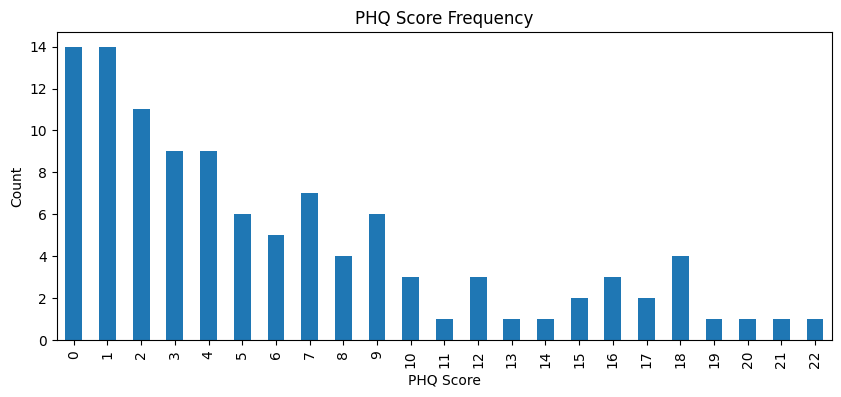

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_phq_distribution(phq_dict, show_plots=True):
    """
    Analyze PHQ score distribution from a dict {Participant_ID: PHQ_Score}.
    
    Returns:
        df: DataFrame with Participant_ID and PHQ_Score
        count_table: PHQ score -> count
        percent_table: PHQ score -> percentage
    """

    # --- Convert dict to dataframe ---
    df = pd.DataFrame(list(phq_dict.items()), columns=["Participant_ID", "PHQ_Score"])
    
    # --- Basic distribution ---
    count_table = df["PHQ_Score"].value_counts().sort_index()
    percent_table = (df["PHQ_Score"].value_counts(normalize=True).sort_index() * 100)

    print("\n=== PHQ Score Count ===")
    print(count_table)

    # --- Visualization ---
    if show_plots:
        plt.figure(figsize=(10,4))
        count_table.plot(kind="bar")
        plt.xlabel("PHQ Score")
        plt.ylabel("Count")
        plt.title("PHQ Score Frequency")
        plt.show()

    return df, count_table, percent_table
phq_df, phq_count_table, phq_percent_table = analyze_phq_distribution(phq_dict)

In [8]:
all_transcripts = generate_dataset(
    transcript_dir=TRANSCRIPT_DIR,
    phq_dict=phq_dict
)
# print(all_transcripts[0])

[!] Empty or malformed transcript for 487, skipping.
Loaded 108 transcripts with PHQ scores.


In [9]:
dataset_word, dataset_sentence, dataset_dialogue = build_text_representations(all_transcripts)
print(dataset_word[0])
print(dataset_sentence[0])
print(dataset_dialogue[0])


(300, "me alright by field the weeks sun probably whatever here no all a enjoy out plan school who always close in specific met i'm can irritated to games diploma own i and two you requirements right business like i to with don't graduated would i no in yeah uh got to they've georgia and job they're break say the high bye um from uh um was the field i different books a it weather i uh enjoy my whatever living with i off annoying a street down it's was a school mean i from always uh like um uh it sure i my easy like cut taking maybe on do don't now once it love lot sports out friendship i'm bye uh it going administration my i i no not school chocolate career took uh when and great would've family enjoy about real yeah um from going them they've semester it like shut i was to um um job with ago semester a easy open books thin back close off yeah high i off uh play could've them the other do me like well i diploma maybe no don't and high going um um and annoying of about approved like yea

In [ ]:
dataset_word

AttributeError: 'list' object has no attribute 'shape'

In [10]:
save_text_representations(
    dataset_word,
    dataset_sentence,
    dataset_dialogue,
    output_dir=PROCESSED_DATA_DIR
)

Saved word-level dataset → ../data/processed/word_level.csv
Saved sentence-level dataset → ../data/processed/sentence_level.csv
Saved dialogue-level dataset → ../data/processed/dialogue_level.csv


## Sun Bin - EDA

- Each entity in format (dataset_length, raw_text, label)
- tokenizer → vocab → convert text

### Previous implementation
- Bahdanau, Cho & Bengio (2015) — Neural Machine Translation by Jointly Learning to Align and Translate (additive attention)
- Yang et al. (2016) — Hierarchical Attention Networks for Document Classification (uses GRU + attention for words → sentences)

Uni-directional Attention

WORDS → Word-GRU → Word-Attention → Sentence vector
SENTENCE VECTORS → Sentence-GRU → Sentence-Attention → Document vector

**DOCUMENT VECTOR → Classifier**